In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#defining transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
])

In [3]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

c:\Users\nithe\Documents\projects\cifar10\.venv\Lib\site-packages\torchvision\datasets\cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


In [4]:
image, label = trainset[0]

print(f"Image Type: {type(image)}") 
print(f"Label Type: {type(label)}") 

print(f"Image Shape: {image.shape}") 

print(f"Label Index: {label}")
print(f"Class Name: {trainset.classes[label]}") 

Image Type: <class 'torch.Tensor'>
Label Type: <class 'int'>
Image Shape: torch.Size([3, 32, 32])
Label Index: 6
Class Name: frog


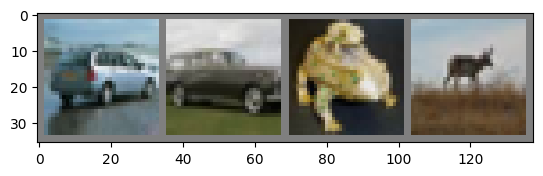

automobile automobile frog  deer 


In [5]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()    
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0) 

dataiter = iter(trainloader)
images, labels = next(dataiter) 

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{trainset.classes[labels[j]]:5s}' for j in range(4)))

In [6]:
#spliting ratio
train_ratio = 0.8
validation_ratio = 0.2

#define sizes
data_size = len(trainset)
train_size = int(train_ratio * data_size)
validation_size = data_size - train_size

In [7]:
#spliting data
train_set, valid_set = random_split(trainset, [train_size, validation_size])
print(len(train_set))   
print(len(valid_set))

40000
10000


In [8]:
#loading the data
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(valid_set, batch_size=64, shuffle=False)

In [ ]:
#define softmax classifier
class softmax(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3 * 32 *32, 10)
        #hidden layer

    def forward(self,x):
        x = x.view(x.size(0), -1)
        return self.linear(x)

In [24]:
device = torch.device("cuda")

#creating model
linear_model = softmax().to(device)

#loss function
loss_func = nn.CrossEntropyLoss()

# print(linear_model.parameters())

#optimizer like gradient descent
optimizer = optim.SGD(linear_model.parameters(), lr=0.01, momentum=0.9)

In [27]:
#training model
def epoch(epoch_index):

    running_loss = 0.0
    last_loss = 0.0

    for i, data in enumerate(train_data):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        #zeroing gradients
        optimizer.zero_grad()

        #just inputs to make the model predict
        output = linear_model(inputs)
        
        #comparing the guessing vs ground truth
        loss = loss_func(output, labels)
        loss.backward()

        #adjust weights
        optimizer.step()
        
        #sending loss to the running function
        running_loss += loss.item()
        if i % 100 == 99:
            last_loss = running_loss / 100 # loss per batch
            print(f'  batch {i + 1} loss: {last_loss}')
            running_loss = 0.

    return running_loss / len(train_data)


In [21]:
def validate_epoch():
    linear_model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    
    with torch.no_grad():
        for inputs, labels in test_data:
            inputs, labels = inputs.to(device), labels.to(device)
            
            #getting raw predictions 
            outputs = linear_model(inputs)
            
            #calculating loss
            loss = loss_func(outputs, labels)
            running_loss += loss.item()
            
            #calculating accuracy
            _, predicted_class = torch.max(outputs, 1) 
            
            #compare guess vs actual label
            correct_predictions += (predicted_class == labels).sum().item()
            total_samples += labels.size(0)
            
    avg_loss = running_loss / len(test_data)
    accuracy = (correct_predictions / total_samples) * 100
    
    return avg_loss, accuracy

In [28]:
epochs = 5

for i in range(epochs):
    # Call the separate functions
    train_loss = epoch(i)
    val_loss, val_acc = validate_epoch()
    
    print(f"Epoch {i}: Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Accuracy: {val_acc:.2f}%")

  batch 100 loss: 1.818741352558136
  batch 200 loss: 1.8406527352333069
  batch 300 loss: 1.835208650827408
  batch 400 loss: 1.8829014670848847
  batch 500 loss: 1.8411467742919922
  batch 600 loss: 1.9060842549800874
Epoch 0: Train Loss: 0.0765 | Val Loss: 2.0451 | Accuracy: 35.07%
  batch 100 loss: 1.8078833615779877
  batch 200 loss: 1.8697420477867126
  batch 300 loss: 1.845181143283844
  batch 400 loss: 1.80583815574646
  batch 500 loss: 1.8424626863002778
  batch 600 loss: 1.9000859296321868
Epoch 1: Train Loss: 0.0743 | Val Loss: 1.9937 | Accuracy: 35.03%
  batch 100 loss: 1.7754788184165955
  batch 200 loss: 1.8322139525413512
  batch 300 loss: 1.8897403728961946
  batch 400 loss: 1.8473563241958617
  batch 500 loss: 1.8756655323505402
  batch 600 loss: 1.9122969818115234
Epoch 2: Train Loss: 0.0779 | Val Loss: 1.9237 | Accuracy: 37.10%
  batch 100 loss: 1.8175333893299104
  batch 200 loss: 1.8055011487007142
  batch 300 loss: 1.8449469745159148
  batch 400 loss: 1.8461788499